## Machine Learning Lab 09 -House Price Prediction using Python


**Submitted by:** Jyosna Philip\
**Register number:** 23122019\
**Class:** 3 M.Sc Data Science A
___


**Contents**

A. Data Exploration


- Preliminary Analysis
- Data Cleaning
- Visualization


___

**A. Data Exploration**

**Dataset Description**

The California Housing dataset includes metrics such as the median income, housing median age, average room numbers, average bedroom numbers, population, average occupancy, latitude, and longitude of a block group in California.

The dataset has 7 features:
1. MedInc: median income in block group.
2. HouseAge: median house age in block group.
3. AveRooms: average number of rooms per household.
4. AveBedrms: average number of bedrooms per household.
5. Population: block group population.
6. AveOccup: average number of household members.
7. Latitude: block group latitude.
8. Longitude: block group longitude.

The target variable is:\
MedHouseVal: median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).

**Importing Libraries**

In [2]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\jyosn\AppData\Local\Temp\ipykernel_15296\3925843854.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


**Loading Data into a pandas DataFrame**

In [3]:
cal_house=fetch_california_housing(as_frame=True)
cal_df=cal_house.frame

**Preliminary Analysis**

In [4]:
cal_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
cal_df.shape

(20640, 9)

The dataset has 20640 observations.

In [6]:
cal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [7]:
cal_df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

All columns have float values and there are no null values.

In [8]:
cal_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


There are outliers in columns like AveBedrms, AveOccup and AveRooms, and MedInc\
The range of values of MedHouseVal, HouseAge,MedInc are also very different from that of Population,AveOccup

**Data Cleaning**

As there were no null values, imputations nedd not be done. Normalisation/Standardization are done after splitting the dataset.

**Categorization -Part 1**

Converting MedInc to categorical

In [9]:
df1=cal_df.copy()


df1.loc[(df1["MedInc"]<=5) & (df1["MedInc"]>=0),"MedIncCat"]=int(0)
df1.loc[(df1["MedInc"]<=10) & (df1["MedInc"]>5),"MedIncCat"]=int(1)
df1.loc[df1["MedInc"]>10,"MedIncCat"]=int(2)
df1.describe()



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,MedIncCat
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558,0.232413
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956,0.456347
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990,0.000000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000,0.000000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000,0.000000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250,0.000000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010,2.000000


In [10]:
df1.drop(columns=["MedInc"],inplace=True)
df1.head()

,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,MedIncCat
0,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,1.0
1,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,1.0
2,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,1.0
3,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,1.0
4,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,0.0


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

accuracy:  0.8776647286821705
f1:  0.8776647286821705


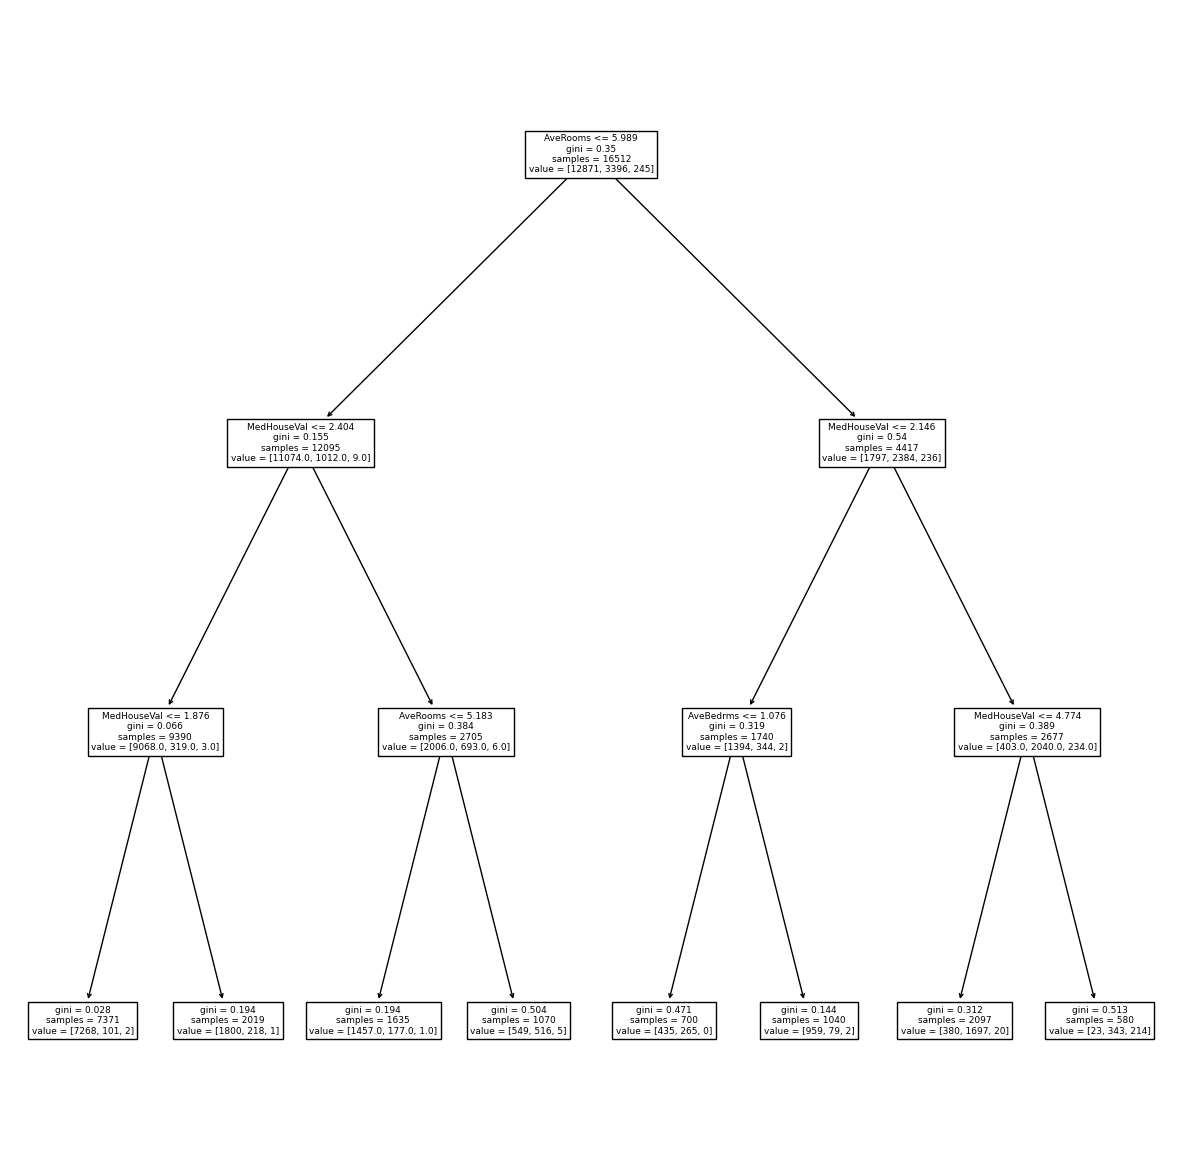

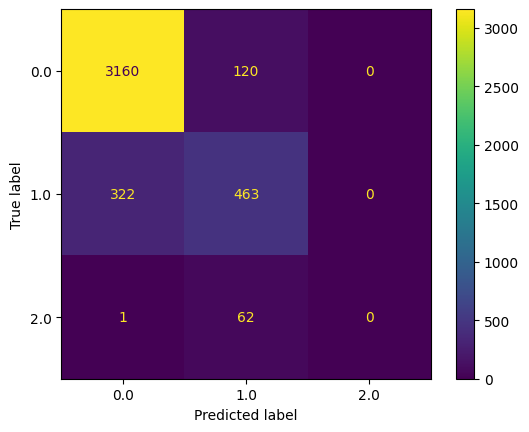

In [12]:
X=df1.iloc[:,:8]
y=df1.iloc[:,8]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
clf=DecisionTreeClassifier(criterion="gini",max_depth=3)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("accuracy: ",accuracy_score(y_test,y_pred))
print("f1: ",f1_score(y_test,y_pred,average='micro'))

import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
tree.plot_tree(clf,feature_names=clf.feature_names_in_)
cm=confusion_matrix(y_test,y_pred,labels=clf.classes_)
fig=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
fig.plot()

Test accuracy= 87%

SVM

In [13]:
from sklearn.svm import SVC

tried svm with kernel=rbf and gamme="scale" got accuracy =0.79

accuracy:  0.7977228682170543
f1:  0.7977228682170543


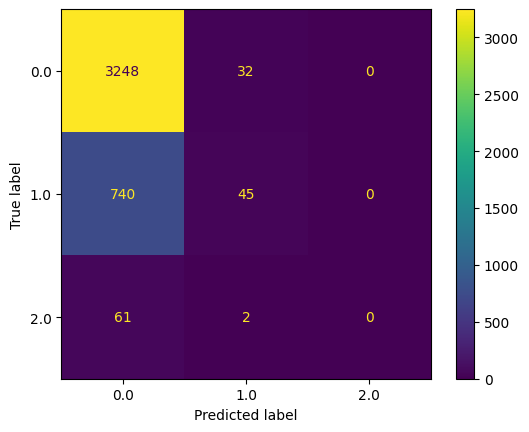

In [14]:
sv=SVC(kernel="rbf",gamma="auto")
sv.fit(X_train,y_train)
y_pred=sv.predict(X_test)
print("accuracy: ",accuracy_score(y_test,y_pred))
print("f1: ",f1_score(y_test,y_pred,average="micro"))
cm=confusion_matrix(y_test,y_pred,labels=sv.classes_)
fig=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=sv.classes_)
fig.plot()

acc:  0.7725290697674418
f1:  0.40235319342268666


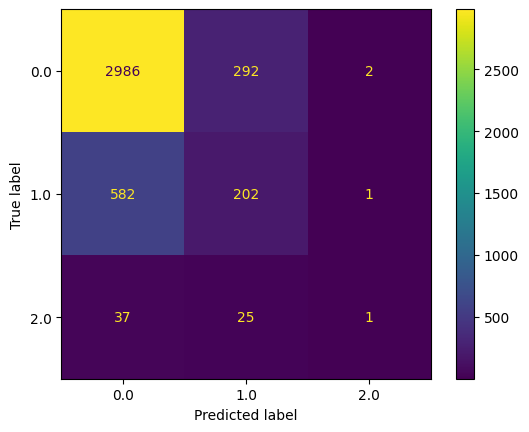

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier(3)
knc.fit(X_train,y_train)
y_predict=knc.predict(X_test)
print("acc: ",accuracy_score(y_test,y_predict))
print("f1: ",f1_score(y_test,y_predict,average="macro"))
cm=confusion_matrix(y_test,y_predict,labels=knc.classes_)
fig=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knc.classes_)
fig.plot()

acc:  0.8168604651162791
f1:  0.715552217489667


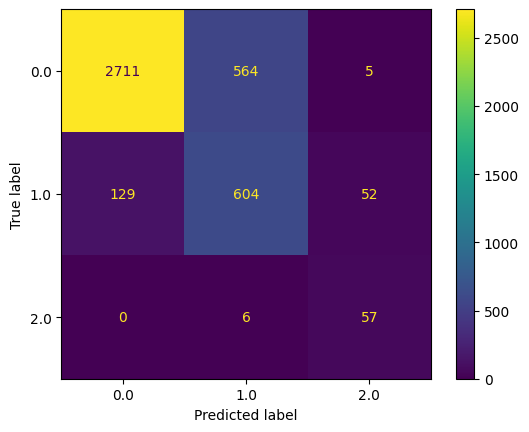

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=5,criterion="gini",max_depth=5,class_weight="balanced")
rf.fit(X_train,y_train)
y_predict=rf.predict(X_test)
print("acc: ",accuracy_score(y_test,y_predict))
print("f1: ",f1_score(y_test,y_predict,average="macro"))
cm=confusion_matrix(y_test,y_predict,labels=rf.classes_)
fig=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf.classes_)
fig.plot()

**Categorization -Part 2**

Converting "MedHouseVal" to categorical

In [19]:
df2=cal_df.copy()


df2.loc[(df1["MedHouseVal"]<=2) & (df1["MedHouseVal"]>=0),"MedHouseValCat"]=int(0)
df2.loc[(df1["MedHouseVal"]<=3.5) & (df1["MedHouseVal"]>2),"MedHouseValCat"]=int(1)
df2.loc[df1["MedHouseVal"]>3.5,"MedHouseValCat"]=int(2)
df2.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,MedHouseValCat
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558,0.546609
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956,0.705105
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990,0.000000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000,0.000000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000,0.000000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250,1.000000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010,2.000000


In [20]:
df2.drop(columns=["MedHouseVal"],inplace=True)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValCat
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,2.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,2.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,2.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,1.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,1.0


In [21]:
X=df2.iloc[:,:8]
y=df2.iloc[:,8]
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

accuracy:  0.6979166666666666
f1:  0.6979166666666666


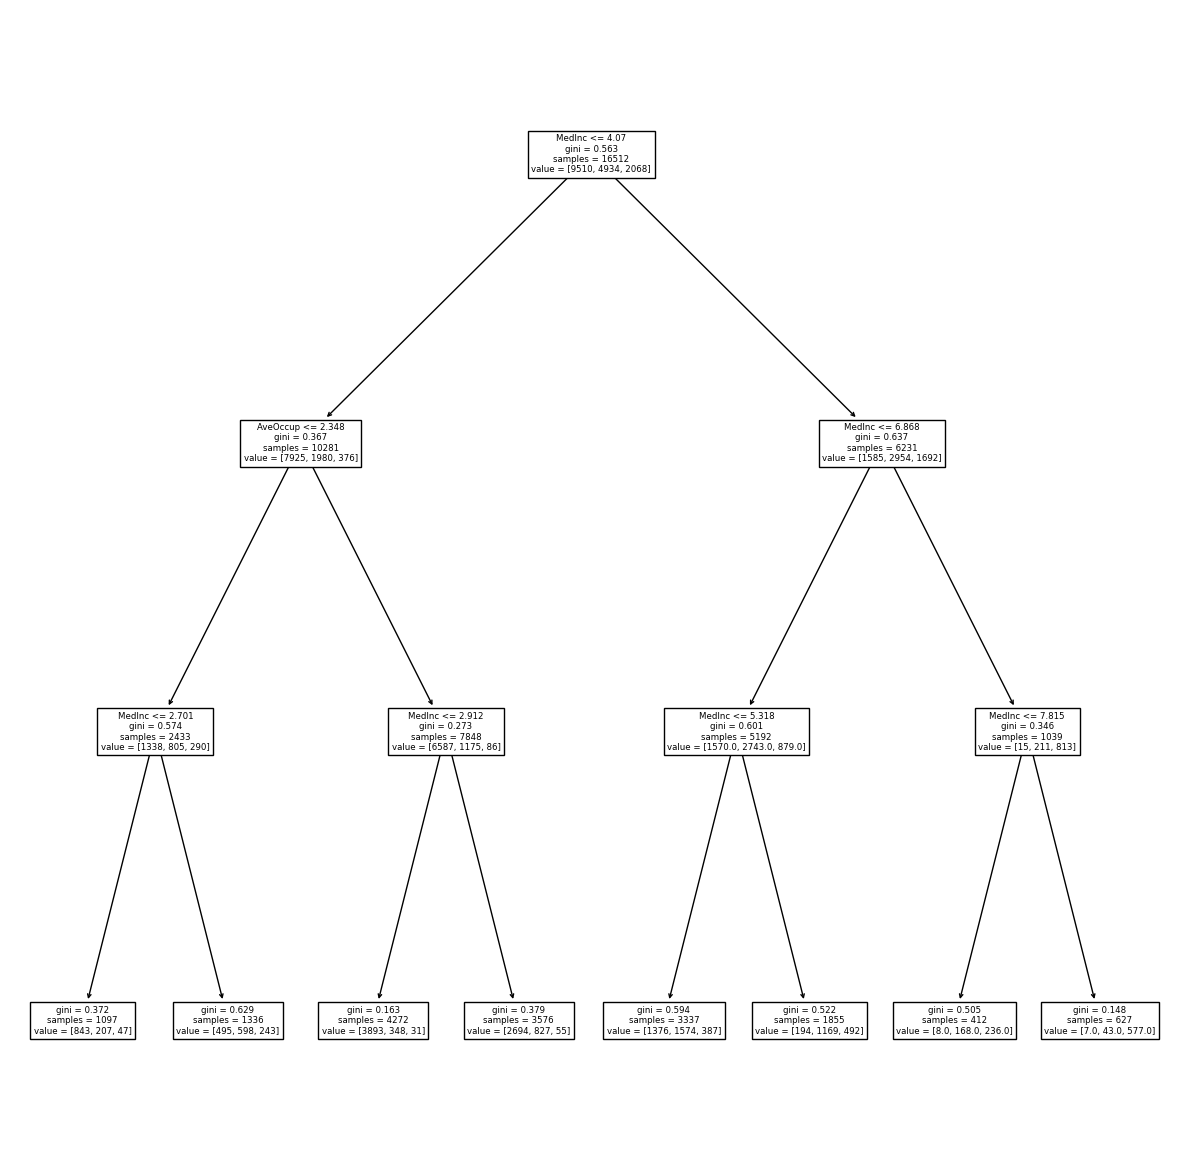

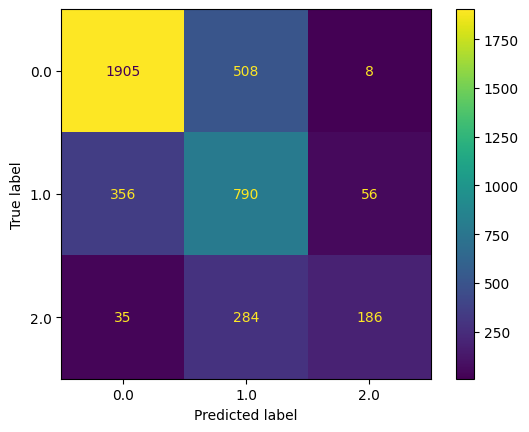

In [23]:

clf=DecisionTreeClassifier(criterion="gini",max_depth=3)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("accuracy: ",accuracy_score(y_test,y_pred))
print("f1: ",f1_score(y_test,y_pred,average='micro'))

import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
tree.plot_tree(clf,feature_names=clf.feature_names_in_)
cm=confusion_matrix(y_test,y_pred,labels=clf.classes_)
fig=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
fig.plot()

accuracy:  0.6005329457364341
f1:  0.6005329457364341


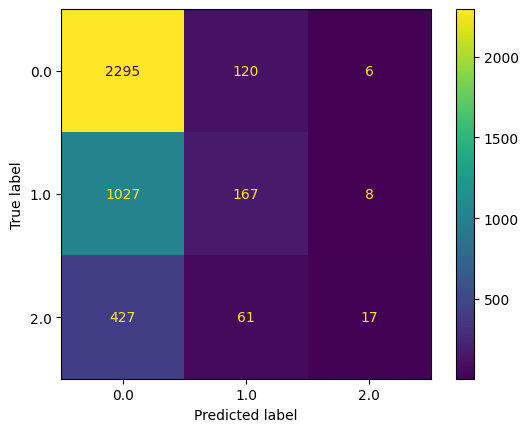

In [27]:
sv=SVC(kernel="rbf",gamma="auto")
sv.fit(x_train,y_train)
y_pred=sv.predict(x_test)
print("accuracy: ",accuracy_score(y_test,y_pred))
print("f1: ",f1_score(y_test,y_pred,average="micro"))
cm=confusion_matrix(y_test,y_pred,labels=sv.classes_)
fig=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=sv.classes_)
fig.plot()

acc:  0.5695251937984496
f1:  0.4284955653361953


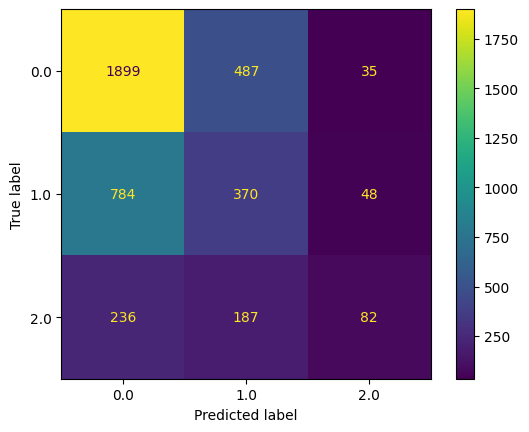

In [30]:

knc=KNeighborsClassifier(3)
knc.fit(x_train,y_train)
y_predict=knc.predict(x_test)
print("acc: ",accuracy_score(y_test,y_predict))
print("f1: ",f1_score(y_test,y_predict,average="macro"))
cm=confusion_matrix(y_test,y_predict,labels=knc.classes_)
fig=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knc.classes_)
fig.plot()

acc:  0.7218992248062015
f1:  0.6651309019358771


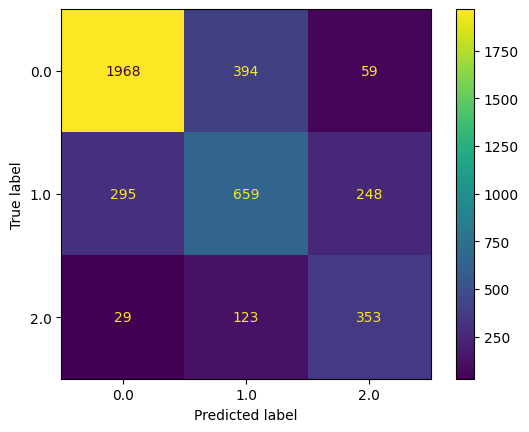

In [33]:

rf=RandomForestClassifier(n_estimators=5,criterion="gini",max_depth=5,class_weight="balanced")
rf.fit(x_train,y_train)
y_predict=rf.predict(x_test)
print("acc: ",accuracy_score(y_test,y_predict))
print("f1: ",f1_score(y_test,y_predict,average="macro"))
cm=confusion_matrix(y_test,y_predict,labels=rf.classes_)
fig=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf.classes_)
fig.plot()

acc:  0.7652616279069767
f1:  0.7137389859139386


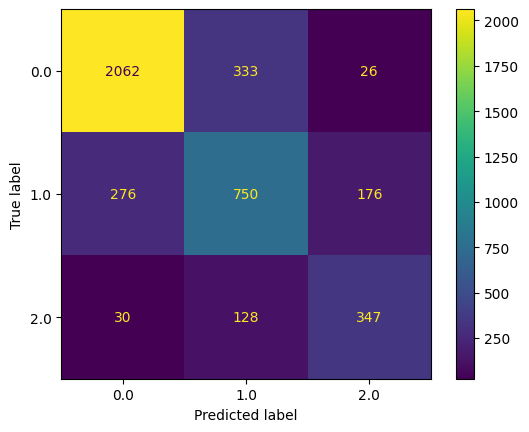

In [34]:
rf=RandomForestClassifier(n_estimators=10,criterion="gini",max_depth=5,class_weight="balanced")
rf.fit(x_train,y_train)
y_predict=rf.predict(x_test)
print("acc: ",accuracy_score(y_test,y_predict))
print("f1: ",f1_score(y_test,y_predict,average="macro"))
cm=confusion_matrix(y_test,y_predict,labels=rf.classes_)
fig=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf.classes_)
fig.plot()

acc:  0.7596899224806202
f1:  0.7117619561811429


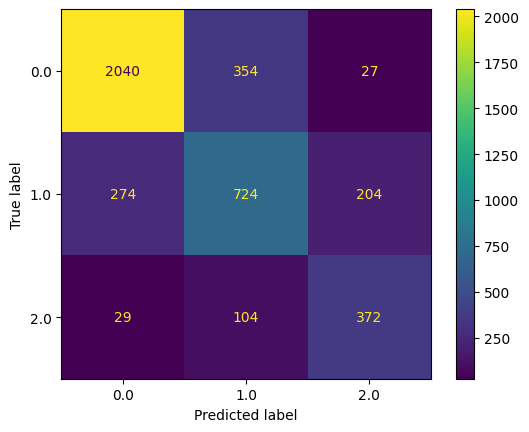

In [35]:
rf=RandomForestClassifier(n_estimators=15,criterion="gini",max_depth=5,class_weight="balanced")
rf.fit(x_train,y_train)
y_predict=rf.predict(x_test)
print("acc: ",accuracy_score(y_test,y_predict))
print("f1: ",f1_score(y_test,y_predict,average="macro"))
cm=confusion_matrix(y_test,y_predict,labels=rf.classes_)
fig=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf.classes_)
fig.plot()

acc:  0.8306686046511628
f1:  0.7826947814518124


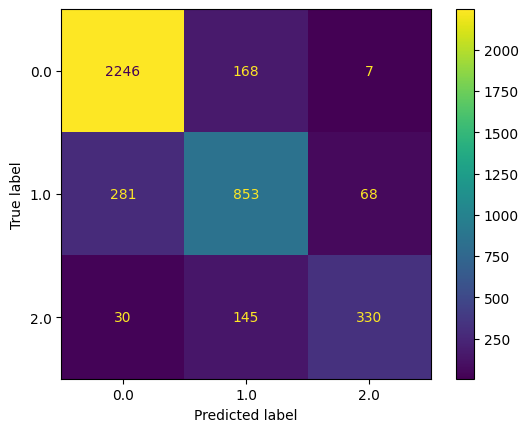

In [52]:
rf=RandomForestClassifier(n_estimators=30,criterion="gini",max_depth=30,class_weight="balanced")
rf.fit(x_train,y_train)
y_predict=rf.predict(x_test)
print("acc: ",accuracy_score(y_test,y_predict))
print("f1: ",f1_score(y_test,y_predict,average="macro"))
cm=confusion_matrix(y_test,y_predict,labels=rf.classes_)
fig=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf.classes_)
fig.plot()